In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("crop_yield_data.csv")
df

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
0,1626,9,636,11,1006,404
1,1959,9,73,11,112,115
2,1360,1,352,5,702,231
3,1794,2,948,7,299,537
4,1630,5,884,5,2733,554
...,...,...,...,...,...,...
2995,1483,9,78,12,2739,155
2996,804,9,481,4,1898,319
2997,870,1,113,7,2282,129
2998,1352,6,767,11,2901,493


In [3]:
df.isnull().sum()

rainfall_mm           0
soil_quality_index    0
farm_size_hectares    0
sunlight_hours        0
fertilizer_kg         0
crop_yield            0
dtype: int64

In [4]:
df.dtypes

rainfall_mm           int64
soil_quality_index    int64
farm_size_hectares    int64
sunlight_hours        int64
fertilizer_kg         int64
crop_yield            int64
dtype: object

In [5]:
df.shape

(3000, 6)

In [6]:
x=df.drop(['crop_yield'],axis=1)
y=df['crop_yield']

In [7]:
x.describe()

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1263.095000,5.506667,498.801000,7.995333,1549.450333
std,432.371756,2.855172,287.122742,2.621501,814.326919
min,500.000000,1.000000,10.000000,4.000000,100.000000
25%,896.000000,3.000000,242.000000,6.000000,869.750000
50%,1277.000000,6.000000,505.000000,8.000000,1542.000000
75%,1636.000000,8.000000,741.000000,10.000000,2225.000000
max,2000.000000,10.000000,1000.000000,12.000000,3000.000000


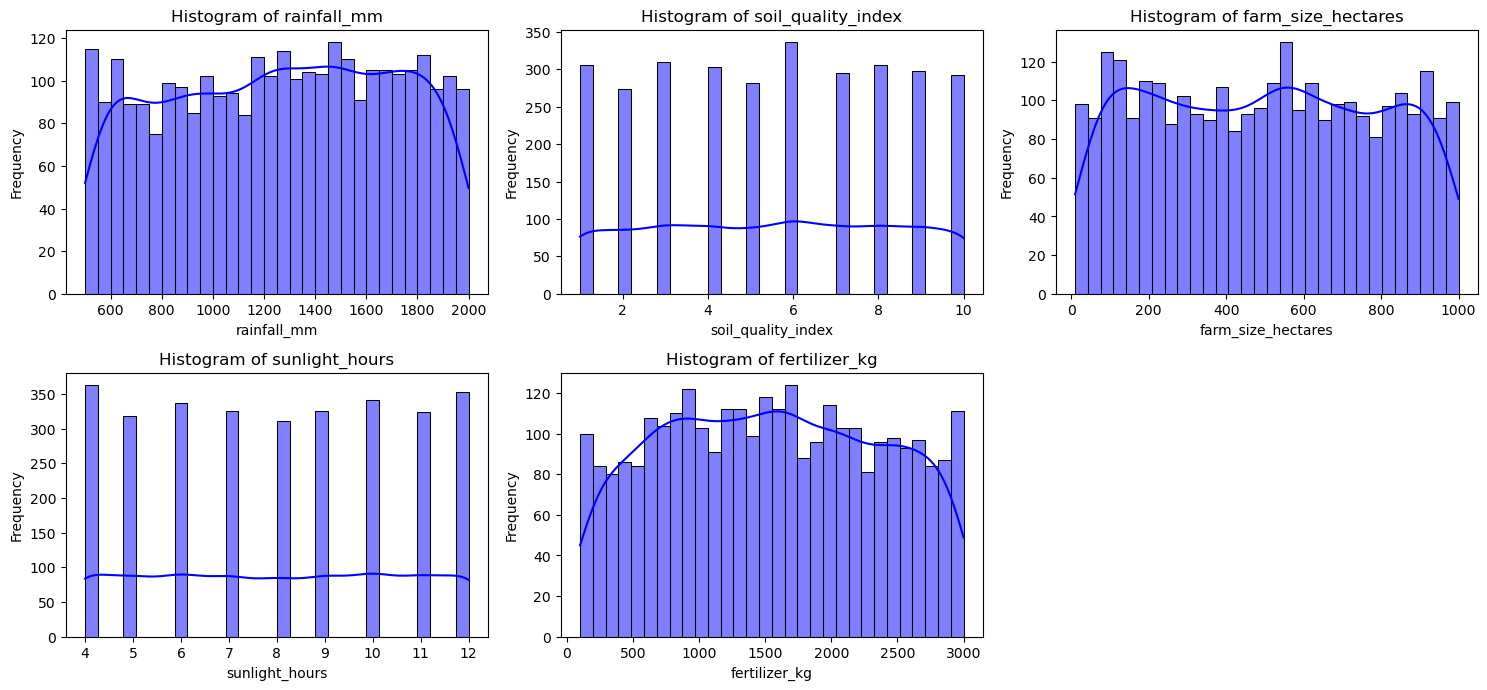

In [8]:
# Set figure size
plt.figure(figsize=(15, 10))

# Loop through each feature and create a histogram
for i, col in enumerate(x.columns, 1):
    plt.subplot(3, 3, i)  # Adjust grid size based on the number of features
    sns.histplot(x[col], bins=30, kde=True, color="blue", edgecolor="black")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

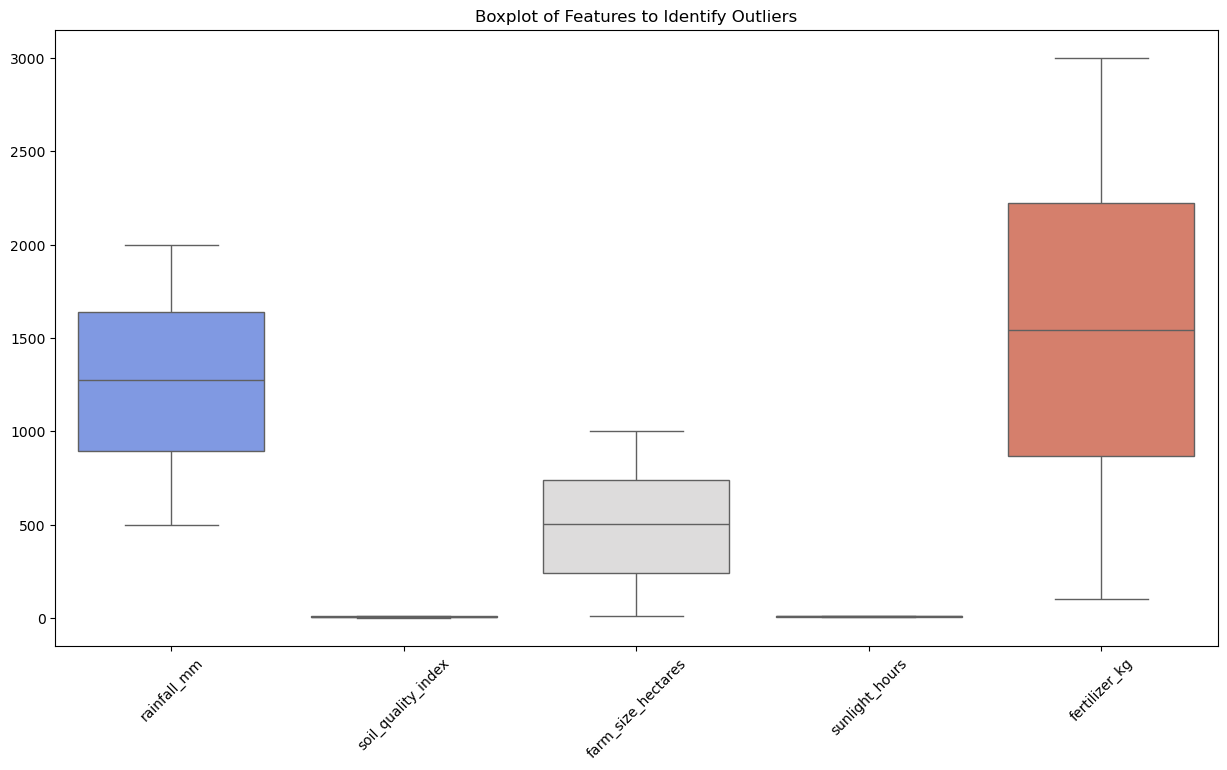

In [9]:
# Boxplots to check for outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=x, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Boxplot of Features to Identify Outliers")
plt.show()

In [10]:
scaler = StandardScaler()
x_scaled= scaler.fit_transform(x)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [12]:
#models = {"Linear Regression": LinearRegression(),
 #   "Random Forest": RandomForestRegressor(random_state=42),
  #  "Decision Tree": DecisionTreeRegressor(random_state=42),
   # "SVM (Linear)": SVR(kernel="linear"),
    #"SVM (Polynomial)": SVR(kernel="poly", degree=3),
    #"SVM (Sigmoid)": SVR(kernel="sigmoid"),
    #"SVM (RBF)": SVR(kernel="rbf"),
    #"KNN": KNeighborsRegressor(),
    #"AdaBoost": AdaBoostRegressor(random_state=42),
    #"Gradient Boosting": GradientBoostingRegressor(random_state=42)}

In [24]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "SVM": SVR(),  # rbf
    "KNN": KNeighborsRegressor(),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)}
     #"XGBoost": XGBRegressor(random_state=42, objective="reg:squarederror")}

In [26]:
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    cross_val = cross_val_score(model, x_train, y_train, cv=5).mean()
    results[name] = {"Train Score": train_score, "Test Score": test_score, "Cross-Val Score": cross_val}

In [28]:
results_df = pd.DataFrame(results).T
results_df

,Train Score,Test Score,Cross-Val Score
Linear Regression,0.999996,0.999996,0.999996
Random Forest,0.999705,0.998303,0.997745
Decision Tree,1.000000,0.993591,0.993103
SVM,0.873298,0.874358,0.836552
KNN,0.981726,0.972783,0.969577
AdaBoost,0.985874,0.985204,0.984406
Gradient Boosting,0.999588,0.999217,0.998996


<Figure size 1200x600 with 0 Axes>

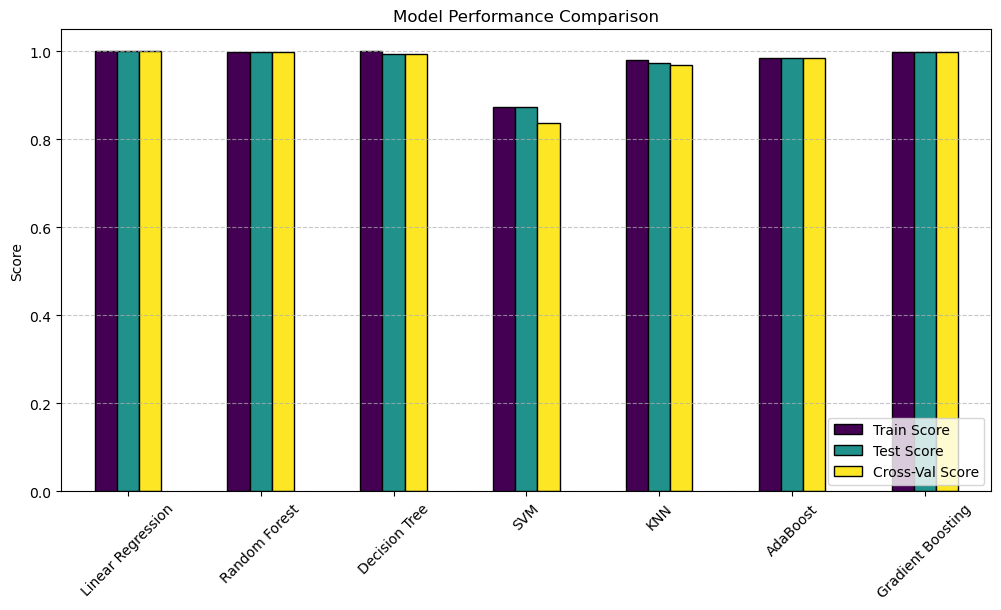

In [30]:
# Visualize model performance
plt.figure(figsize=(12, 6))
results_df.plot(kind="bar", figsize=(12, 6), colormap="viridis", edgecolor="black")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

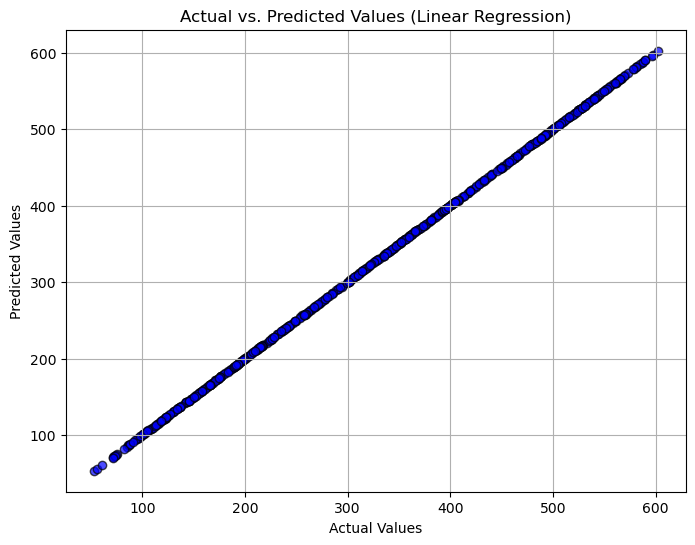

In [32]:
#Use Linear Regression as the best model
best_model = LinearRegression()
best_model.fit(x_train, y_train)

# Predict on test set
y_pred = best_model.predict(x_test)

# Scatter Plot: Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolors='black')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Linear Regression)")
plt.grid(True)
plt.show()

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model Initialization
best_model = LinearRegression()

# Model Training
best_model.fit(x_train, y_train)

# Predictions
y_pred = best_model.predict(x_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Absolute Error: 0.24319513924681171
Mean Squared Error: 0.08176058241410307
R-squared Score: 0.9999961820468685


In [36]:
import joblib
joblib.dump(best_model,r"C:\Users\DELL\Desktop\streamlit\finalcode.pkl")

['C:\\Users\\DELL\\Desktop\\streamlit\\finalcode.pkl']

In [38]:
joblib.dump(scaler,r"C:\Users\DELL\Desktop\streamlit\scaler.pkl")

['C:\\Users\\DELL\\Desktop\\streamlit\\scaler.pkl']